# 1-D perclolation simulation

In [2]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
L, T = 2000, 10000 ## latice num, simul time
s = 3 ## cluster size
p = 0.5 ## occupied probabiliy

In [7]:
aver_list = []

for j in tqdm(range(T)):
    site = ""
    aver =0
    count = 0
    for i in range(L):
        if np.random.random() < p:
            site += "1"
        else :
            site += " "
    site_split = site.split()
    cluster = [len(w) for w in site_split]
    
    for i in range(len(cluster)):
        if cluster[i] == s:
            aver += 1        
    aver_list.append(aver*s/L)

In [33]:
aver_list = np.array(aver_list)

(array([  1.,   1.,   0.,   2.,   0.,   0.,   0.,   5.,   0.,  13.,   0.,
         14.,  14.,   0.,  28.,   0.,  45.,   0.,  40.,   0.,  77.,   0.,
         94.,   0., 123., 155.,   0., 202.,   0., 241.,   0., 270.,   0.,
        355.,   0., 342.,   0., 424., 440.,   0., 482.,   0., 508.,   0.,
        528.,   0., 572.,   0., 566.,   0., 545., 537.,   0., 489.,   0.,
        446.,   0., 376.,   0., 361.,   0., 318., 292.,   0., 221.,   0.,
        201.,   0., 153.,   0., 135.,   0.,  97.,   0.,  66.,  48.,   0.,
         42.,   0.,  36.,   0.,  31.,   0.,  23.,   0.,  14.,   0.,  11.,
          5.,   0.,   3.,   0.,   1.,   0.,   3.,   0.,   1.,   0.,   0.,
          3.]),
 array([0.0555 , 0.05631, 0.05712, 0.05793, 0.05874, 0.05955, 0.06036,
        0.06117, 0.06198, 0.06279, 0.0636 , 0.06441, 0.06522, 0.06603,
        0.06684, 0.06765, 0.06846, 0.06927, 0.07008, 0.07089, 0.0717 ,
        0.07251, 0.07332, 0.07413, 0.07494, 0.07575, 0.07656, 0.07737,
        0.07818, 0.07899, 0.0798 ,

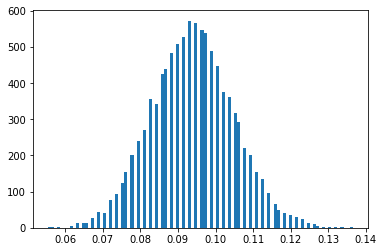

In [34]:
plt.hist(aver_list, bins = 100)

In [37]:
print(np.average(aver_list))
print(np.average(aver_list*(L/s)))
print(np.average(aver_list/s))

0.0938814
62.5876
0.0312938


In [36]:
print(s*((1-p)**2)*(p**s)) ## probability
print(L*((1-p)**2)*(p**s)) ## frequency
print(((1-p)**2)*(p**s)) ## cluster number density

0.09375
62.5
0.03125


# 2-D percolation simulation

In [1]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sb

/root/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
## make same labeling of lattice when above and left lattice is occupied
def union(x, y ,label_ ,change_):
    for a in range(x):
            for b in range(L):
                if (labeled_lattice[b][a] == change_):
                    labeled_lattice[b][a] = label_
    labeled_lattice[y][x] = label_

In [3]:
def make_lattice(L,p):    
    lattice_temp = np.zeros((L,L))
    for i in range(L):
        for j in range(L):
            if p > np.random.random():
                lattice_temp[j][i] = 1

## make outside zero to avoid out or range in for sentence
    for i in range(L):
        for j in range(L):
            lattice_temp[0][i] = 0
            lattice_temp[j][0] = 0
    return lattice_temp

In [4]:
## labeling lattice with cluster
def labelling(lattice, L):
    labeled_lattice = np.zeros((L,L))
    label = 0
    for i in range(1,L):
        for j in range(1,L):
            if lattice[j][i] == 1:
                if (lattice[j-1][i] != 1) and (lattice[j][i-1] != 1):
                    label += 1
                    labeled_lattice[j][i] = label
                elif (lattice[j-1][i] == 1) and (lattice[j][i-1] != 1):
                    labeled_lattice[j][i] = labeled_lattice[j-1][i]
                elif (lattice[j-1][i] != 1) and (lattice[j][i-1] == 1):
                    labeled_lattice[j][i] = labeled_lattice[j][i-1]
                elif (lattice[j-1][i] == 1) and (lattice[j][i-1] == 1):
                    if (lattice[j-1][i] > lattice[j][i-1]):
                        union(i,j,labeled_lattice[j][i-1],labeled_lattice[j-1][i])
                    else :
                        union(i,j,labeled_lattice[j-1][i],labeled_lattice[j][i-1])
    return labeled_lattice

In [5]:
def show_clustersize(lattice,labeled_lattice):
    cluster_size_array = np.zeros(int(np.max(labeled_lattice)))
    for i in range(1,L):
        for j in range(1,L):
            if labeled_lattice[j][i] != 0:
                a = int(labeled_lattice[j][i] - 1)
                cluster_size_array[a] += 1
    if (len(cluster_size_array) != 0):
        return np.max(cluster_size_array)
    else :
        return 0

In [13]:
## lattice size(out side lattice that i make +1 is trick to avoid index problem in for sentence) \
## simul time step for changing p, simul time step for same p
L, T1, T2 = 50+1, 100, 100 
p_start = 1e-2 ## start probability of occuping lattice

In [ ]:
i = 0
cluster_size_50 = np.zeros(T1)
for p in tqdm(np.linspace(p_start,1,T1)):
    cluster_size_aver = 0
    for j in range(T2):
        lattice = make_lattice(L,p)
        labeled_lattice = labelling(lattice, L)
        cluster_size_aver += show_clustersize(lattice,labeled_lattice)
    cluster_size_aver = cluster_size_aver/T2
    cluster_size_50[i] = cluster_size_aver
    i += 1

In [10]:
cluster_size_10

array([ 0.63,  0.95,  1.12,  1.2 ,  1.4 ,  1.57,  1.58,  1.73,  1.92,
        2.06,  2.17,  2.31,  2.48,  2.58,  2.78,  2.97,  2.99,  2.99,
        3.14,  3.42,  3.39,  3.49,  3.57,  3.89,  3.82,  4.29,  4.42,
        4.61,  4.51,  4.47,  4.87,  4.89,  5.25,  4.83,  5.1 ,  5.28,
        5.49,  5.38,  5.56,  5.39,  5.85,  5.57,  5.71,  5.89,  5.88,
        5.85,  6.  ,  6.59,  6.26,  6.29,  5.8 ,  6.88,  6.54,  6.65,
        7.  ,  7.16,  7.43,  7.28,  7.22,  7.54,  7.35,  7.86,  7.46,
        7.35,  7.98,  8.37,  7.83,  8.43,  8.23,  8.82,  8.8 ,  9.05,
        8.91,  8.98,  9.26,  8.44,  9.45,  9.7 ,  9.66, 10.41,  9.88,
       10.7 , 10.82, 10.79, 10.86, 11.99, 12.51, 12.7 , 12.82, 13.83,
       13.52, 13.73, 14.14, 14.47, 15.15, 15.48, 16.99, 17.19, 18.48,
       19.  ])

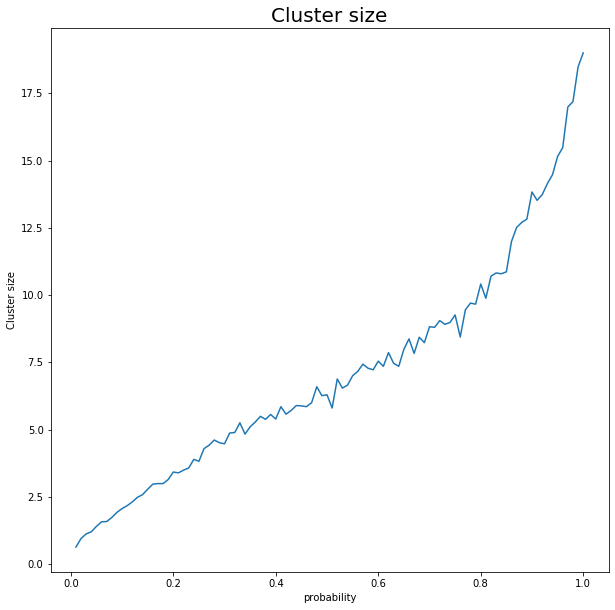

In [12]:
fig, axes = plt.subplots(figsize = (10,10))
axes.set_title("Cluster size", size = 20)
axes.set_xlabel("probability", size = 10)
axes.set_ylabel("Cluster size", size = 10)
axes = plt.plot(np.linspace(p_start,1,T1), cluster_size_10)

In [ ]:
## ploting labeling lattice and lattice when p = 0.5
fig, axes = plt.subplots(1,2,figsize = (20,10))
axes[0].set_xlim([0.5,20.5])
axes[0].set_ylim([0.5,20.5])
axes[1].set_xlim([0.5,20.5])
axes[1].set_ylim([0.5,20.5])
axes[0].imshow(labeled_lattice[500], cmap="PuBu")
axes[1].imshow(lattice[500], cmap="binary")